<a href="https://colab.research.google.com/github/hpink97/tensorflow_keras_practice/blob/main/boston_housing_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction using tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
(train_data, train_labels), (test_data,test_labels) = (boston_housing.load_data())

### View the training data
- We have 12 varaibles, which all appear to be numeric
- Numeric variables are on different scales
- We also only have 403 test data points

In [3]:
test_df = pd.DataFrame(train_data)
test_df.tail(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
394,8.98296,0.0,18.10,1.0,0.7700,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60
395,45.74610,0.0,18.10,0.0,0.6930,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
396,10.67180,0.0,18.10,0.0,0.7400,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
397,0.22969,0.0,10.59,0.0,0.4890,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97
398,18.49820,0.0,18.10,0.0,0.6680,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79
403,0.01439,60.0,2.93,0.0,0.4010,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38


In [4]:
## scale data
transformer = StandardScaler().fit(train_data)
scaled_train_data = transformer.transform(train_data)
scaled_test_data = transformer.transform(test_data)
pd.DataFrame(scaled_train_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.381973,-0.483615,-0.616568,-0.256833,-0.933487,-0.938177,-0.251223,1.157680,-0.741356,-1.040501,-0.262093,0.448077,0.477421
400,-0.388221,0.358906,-0.609218,-0.256833,-0.796907,-0.038202,-1.888860,0.339660,-0.741356,-1.100681,0.056428,0.448077,-0.848908
401,-0.402030,0.990797,-0.741515,-0.256833,-1.019702,-0.333021,-1.638018,1.430403,-0.971569,-0.613224,-0.717123,0.079439,-0.677769
402,-0.172920,-0.483615,1.245881,-0.256833,2.677335,-0.787241,1.056737,-1.044075,-0.511142,-0.017443,-1.718189,-0.987644,0.420835


In [5]:
## means for each feature are very close to zero
scaled_train_data.mean(axis=0)

array([-1.01541438e-16,  1.09923072e-17,  1.74337992e-15, -1.26686340e-16,
       -5.25377321e-15,  6.41414864e-15,  2.98441140e-16,  4.94653823e-16,
        1.12671149e-17, -1.98136337e-16,  2.36686358e-14,  5.95679996e-15,
        6.13920356e-16])

In [6]:
#standard deviation for all features are 1
scaled_train_data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## Define a function to build and compile a sequential model of dense layers of variable size
- will allow experimentation with neural net architeture later on

In [7]:
def build_model(hidden_layer_sizes, output_layer_size):
  model = keras.Sequential()
  for n in hidden_layer_sizes:
    model.add(layers.Dense(n, activation='relu'))
  model.add(layers.Dense(output_layer_size))
  #compile model
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

  return(model)




### Perform K-fold cross validation (as few datapoints)

In [8]:
def train_CV(k_folds, n_epoch, model_hidden_layer_sizes):
  #calculate the number of validation samples required
  n_val_samples = len(train_data)//k_folds
  #initiate empty arrays to fill with validation results
  train_mae_history =[]
  val_mae_history =[]
  for k in range(k_folds):
    print(f"----Processing fold #{k+1} of {k_folds}----")
    #assign validation split for each k-fold
    start_row = k*n_val_samples
    end_row = (k+1)*n_val_samples
    val_data = scaled_train_data[start_row:end_row]
    val_targets = train_labels[start_row:end_row]
    #set non-validation samples as training smaples
    partial_train = np.concatenate([scaled_train_data[:start_row],
                                  scaled_train_data[end_row:]],axis=0)
    
    partial_train_labels =  np.concatenate([train_labels[:start_row],
                                                            train_labels[end_row:]],axis=0)
    
    #create and compile model with inpuuted archietcture
    model = build_model(hidden_layer_sizes=model_hidden_layer_sizes,
                        output_layer_size= 1)
    #train model
    training_history = model.fit(partial_train,partial_train_labels,
                                validation_data = (val_data, val_targets),
                                epochs=n_epoch, batch_size =24, verbose=0)


    train_mae_history.append(training_history.history['mae'])
    val_mae_history.append(training_history.history['val_mae'])
  
  #calculate the average MAE scores (across all K-folds) for each epoch
  avg_val_mae = [np.mean([x[i] for  x in val_mae_history]) for i in range(n_epoch)]
  avg_train_mae = [np.mean([x[i] for  x in train_mae_history]) for i in range(n_epoch)]
  ##find epoch where best validation score (across folds) occurs
  best_epoch = [i for i, x in enumerate(avg_val_mae == np.min(avg_val_mae)) if x]
  best_epoch = best_epoch[0]+1

  print(f"best validation MAE was {np.min(avg_val_mae):.3f}, which was observed at epoch {best_epoch}")
  
  return avg_train_mae, avg_val_mae,best_epoch


In [9]:
def plot_train_val_mae(train, val,start_epoch):
  trained_epochs = range(1, len(val)+1)
  start_index = start_epoch-1
  trained_epochs_trunc = trained_epochs[start_index:]
  train_mae_trunc = train[start_index:]
  val_mae_trunc = val[start_index:]

  plt.plot(trained_epochs_trunc, train_mae_trunc, 'ro',
          label='Training MAE',)
  plt.plot(trained_epochs_trunc, val_mae_trunc, 'b',
          label = 'Validation MAE')
  plt.hlines(y=np.min(val_mae_trunc),
             xmin=-1,
             xmax=np.max(trained_epochs_trunc),
             label = 'Best Validation MAE')
  plt.xlabel('Epochs (#Training Cycles)')
  plt.ylabel('Mean Abosulte Error (MAE)')
  plt.legend()

In [10]:
def test_model(model_hidden_layer_sizes, n_epoch):
  model = build_model(hidden_layer_sizes=model_hidden_layer_sizes,
                        output_layer_size= 1)
  
  model.fit(scaled_train_data, train_labels, epochs=n_epoch, batch_size=16, verbose=0)
  test_mse, test_mae = model.evaluate(scaled_test_data, test_labels,verbose=0)

  print(f"Test Mean Absolute Error (MAE) = {test_mae:.3f}")


### Train the first model - start off (over) simplistic with small layer sizes
- Two dense layers, of 12 and 8 neurions respectively


In [11]:
layer_sizes_1 = [12,8]
train_mae1, val_mae1, best_epoch1 = train_CV(k_folds=4,
                                        n_epoch=500, 
                                        model_hidden_layer_sizes=layer_sizes_1)

----Processing fold #1 of 4----
----Processing fold #2 of 4----
----Processing fold #3 of 4----
----Processing fold #4 of 4----
best validation MAE was 2.340, which was observed at epoch 398


In [12]:
test_model(model_hidden_layer_sizes=layer_sizes_1, n_epoch=best_epoch1)

Test Mean Absolute Error (MAE) = 2.635


## Try to make a deeper more complex model to see if we can improve our results
- Try a model with 4 dense layers
- Our validation accuracy is considerably reduced (20% improvement)
- However the test accuracy is actually worse...
- Suggests model is far too complex and is over-fitting due to our small sample size

In [13]:
layer_sizes_2 = [512,256,128,64]
train_mae2, val_mae2, best_epoch2 = train_CV(k_folds=4,
                                        n_epoch=750, 
                                        model_hidden_layer_sizes=layer_sizes_2)

----Processing fold #1 of 4----
----Processing fold #2 of 4----
----Processing fold #3 of 4----
----Processing fold #4 of 4----
best validation MAE was 2.185, which was observed at epoch 105


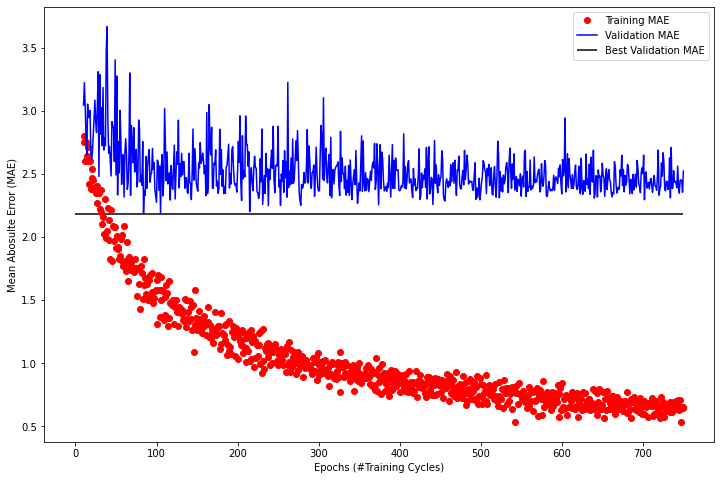

In [14]:
plot_train_val_mae(train_mae2, val_mae2,start_epoch=10)

In [15]:
test_model(model_hidden_layer_sizes=layer_sizes_2, n_epoch=best_epoch2)

Test Mean Absolute Error (MAE) = 2.757


## Increasing model simplicity 
- Create a more simplistic model - dense layers of 96 and 64 neurons respectively
- Slightly worse validation results than previously
- However, performs much better on test data

---



In [16]:
layer_sizes_3 = [64,32]
train_mae3, val_mae3, best_epoch3 = train_CV(k_folds=4,
                                        n_epoch=300, 
                                        model_hidden_layer_sizes=layer_sizes_3)

----Processing fold #1 of 4----
----Processing fold #2 of 4----
----Processing fold #3 of 4----
----Processing fold #4 of 4----
best validation MAE was 2.281, which was observed at epoch 220


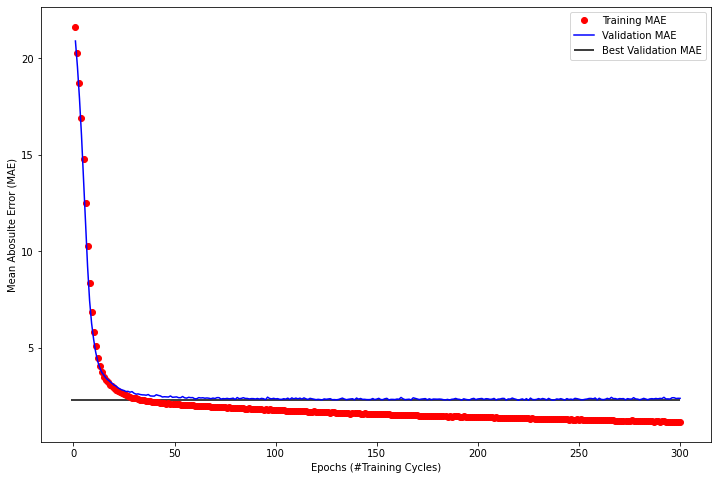

In [17]:
plot_train_val_mae(train_mae3, val_mae3,start_epoch=1)

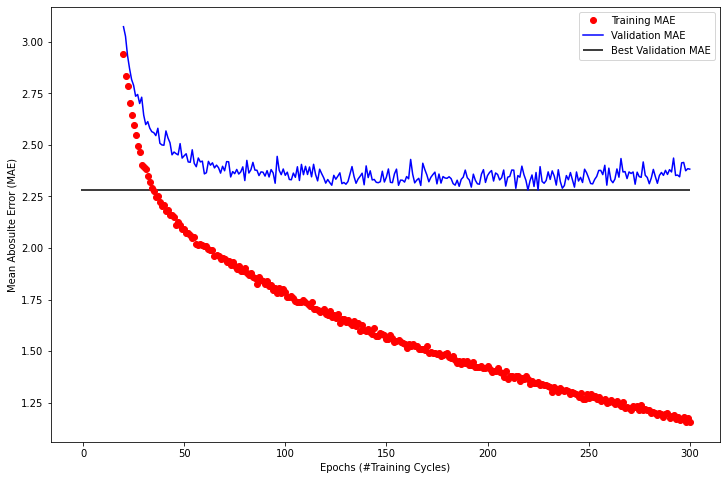

In [18]:
plot_train_val_mae(train_mae3, val_mae3,start_epoch=20)

In [19]:
test_model(model_hidden_layer_sizes=layer_sizes_3, n_epoch=best_epoch3)

Test Mean Absolute Error (MAE) = 2.480


In [20]:
layer_sizes_4 = [42,28]
train_mae4, val_mae4, best_epoch4 = train_CV(k_folds=6,
                                        n_epoch=1500, 
                                        model_hidden_layer_sizes=layer_sizes_4)

----Processing fold #1 of 6----
----Processing fold #2 of 6----
----Processing fold #3 of 6----
----Processing fold #4 of 6----
----Processing fold #5 of 6----
----Processing fold #6 of 6----
best validation MAE was 2.187, which was observed at epoch 270


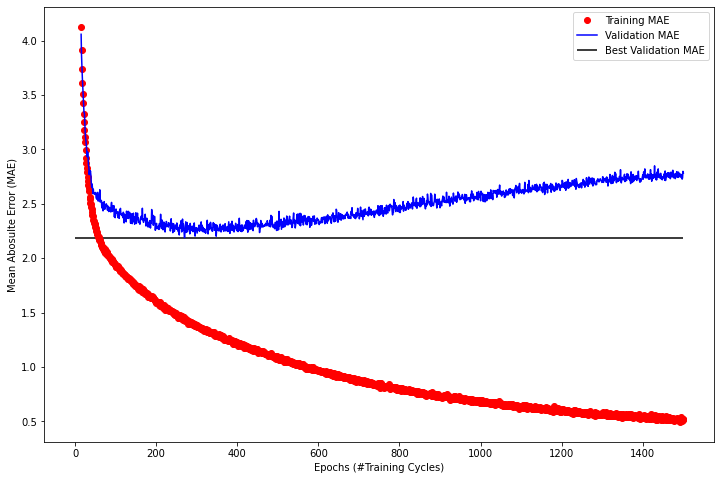

In [21]:
plot_train_val_mae(train=train_mae4, val = val_mae4, start_epoch=15)

In [22]:
test_model(model_hidden_layer_sizes=layer_sizes_4, n_epoch=best_epoch4)

Test Mean Absolute Error (MAE) = 2.539
